<a href="https://colab.research.google.com/github/selyraa/2141720005-pcvk-2023/blob/main/week-11/JS11_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LATIHAN PRAKTIKUM

## Object Detection

Metode yang digunakan:
1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

## Import Library

In [1]:
import cv2 as cv
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Implementasi Enam Metode Template Matching pada OpenCV

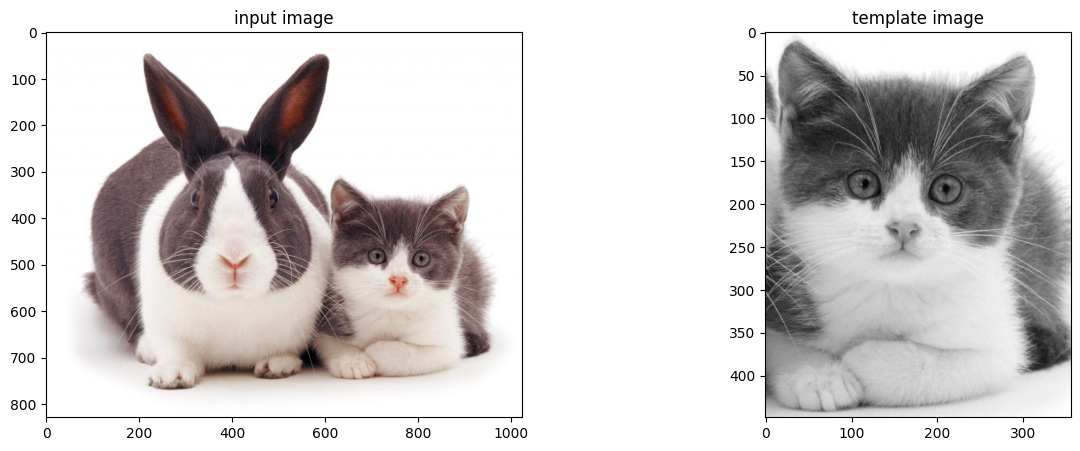

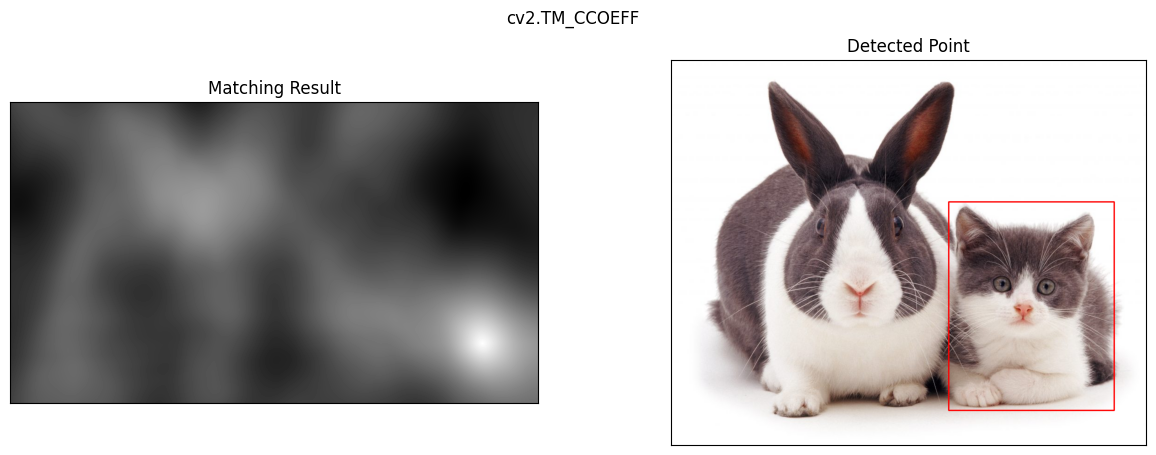

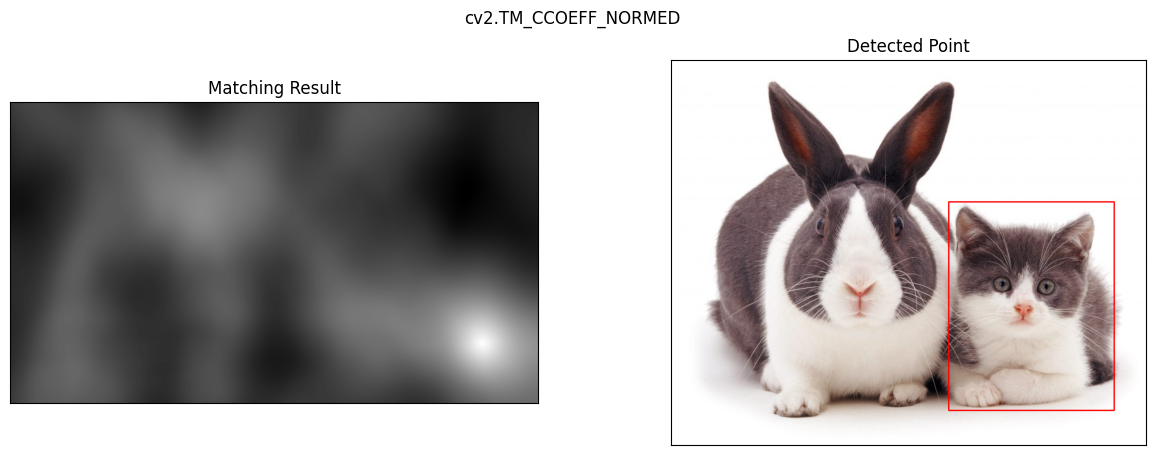

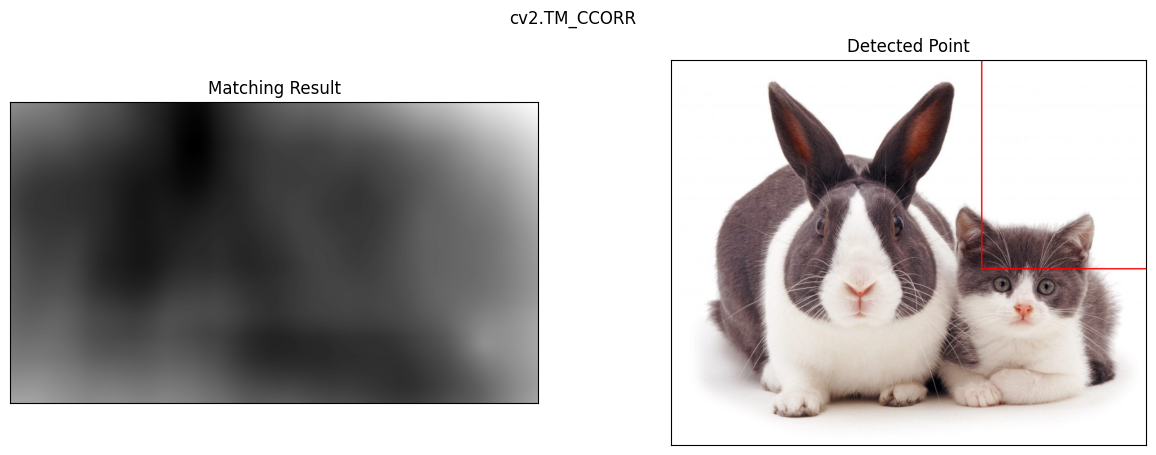

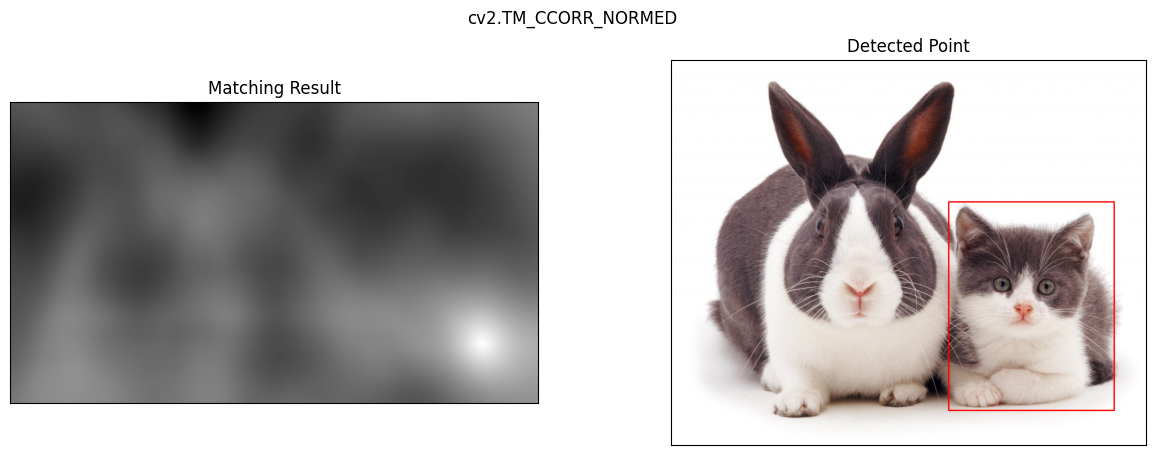

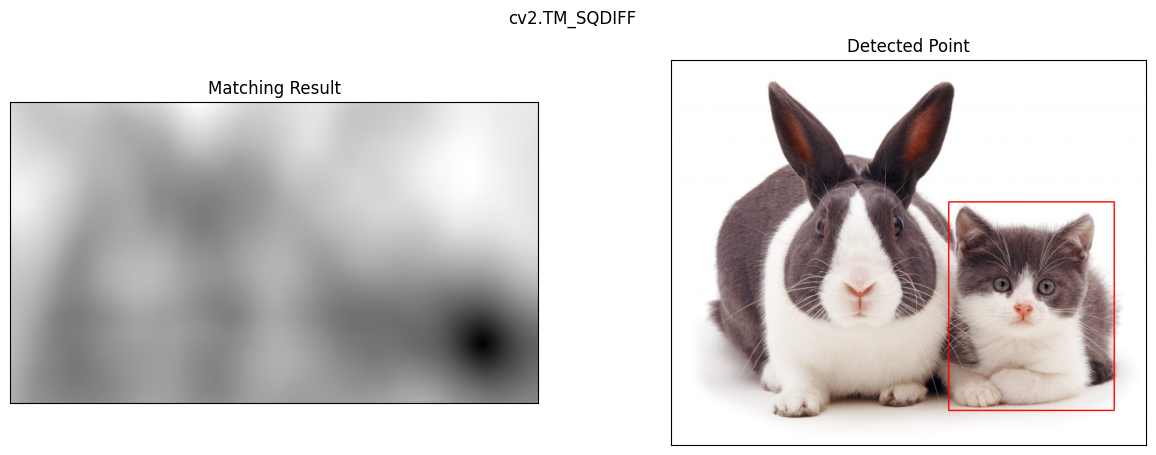

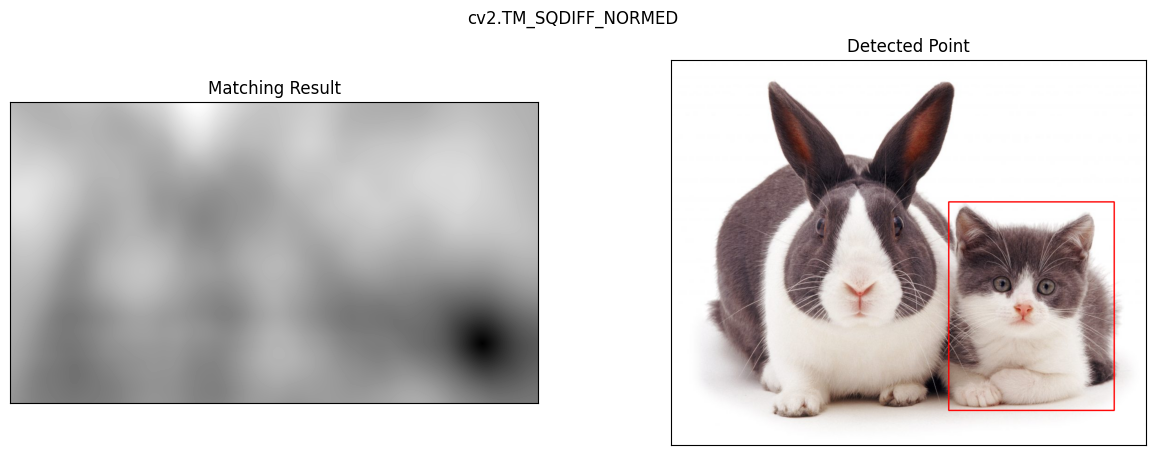

In [3]:
# Baca gambar utama dan template
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

template = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/cat2_templatejpg.jpg', 0)
w, h = template.shape[::-1]

f, axarr = plt. subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Metode Template Matching
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for method in methods:
    img = img2.copy()
    method_name = eval(method)

    # Lakukan Template Matching
    res = cv2.matchTemplate(img_gray, template, method_name)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Tentukan posisi hasil matching
    if method in ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Gambar kotak di sekitar hasil matching
    cv2.rectangle(img, top_left, bottom_right, (0, 0, 255), 2)

    # Tampilkan hasil matching
    plt.figure(figsize=(15,5))
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(method)

    plt.show()


## 2. Implementasi Konsep Template Matching tanpa Menggunakan Library OpenCV untuk Multiple Object

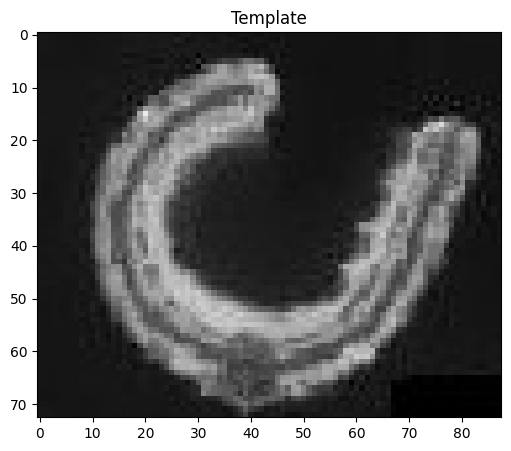

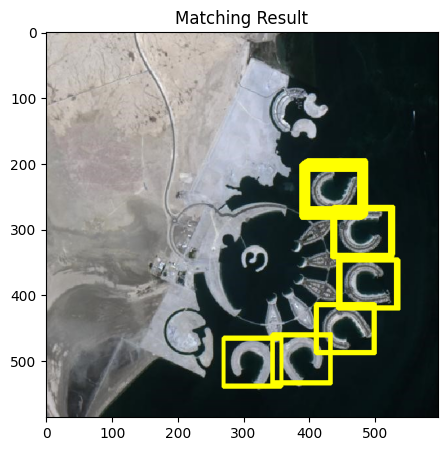

In [54]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
template = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain-template.jpg', cv.IMREAD_GRAYSCALE)

w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray, template, cv.TM_CCOEFF_NORMED)
threshold = 0.44

loc = np.where(res >= threshold)

plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
plt.title('Template')

thickness = 2

# Gambar kotak untuk setiap deteksi dengan ketebalan yang sama
for pt in zip(*loc[::-1]):
    cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), thickness)

# Tampilkan hasil matching
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Matching Result')

plt.show()

## 3. Implementasi Metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV

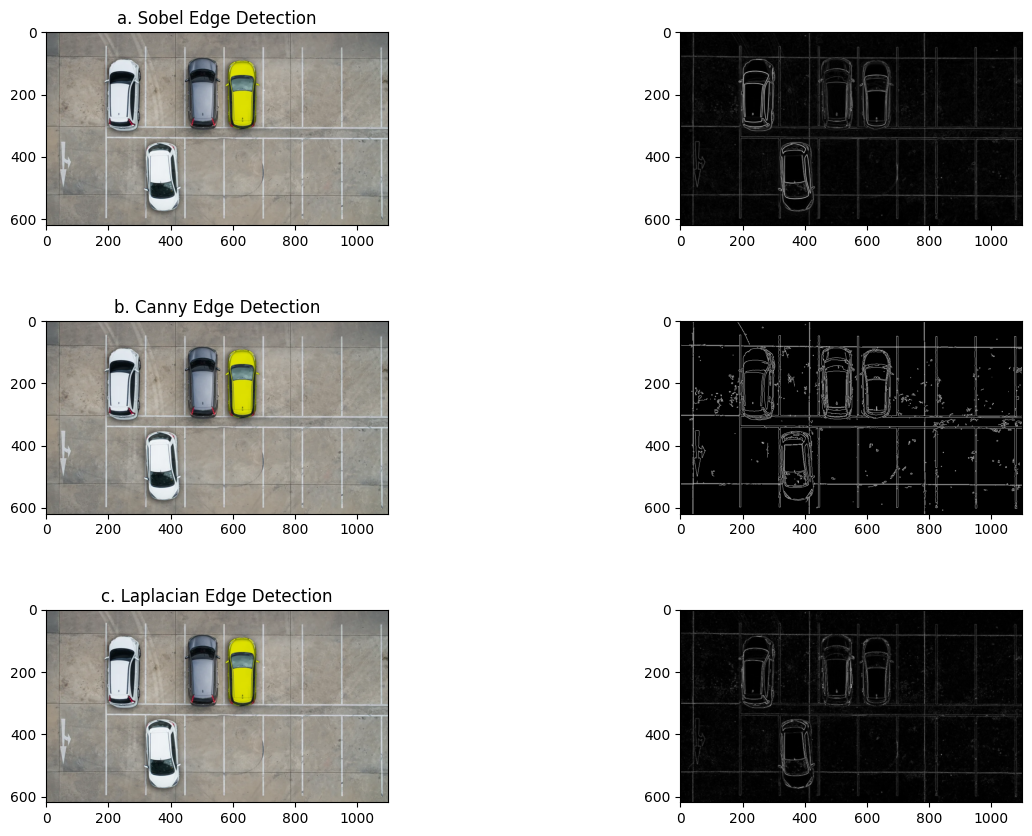

In [5]:
# Baca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/car-park.jpg')
img_gray = img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# Metode Sobel Edge Detection
sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)

# Metode Canny Edge Detection
canny_edges = cv2.Canny(img_gray, 50, 150)

# Metode Laplacian Edge Detection
laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
laplacian_edges = np.uint8(np.absolute(laplacian))

# Tampilkan hasil
plt.figure(figsize=(15, 10))

# Baris 1
plt.subplot(321), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('a. Sobel Edge Detection')

plt.subplot(322), plt.imshow(sobel_edges, cmap='gray')

plt.subplots_adjust(hspace=0.5)

# Baris 2
plt.subplot(323), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('b. Canny Edge Detection')

plt.subplot(324), plt.imshow(canny_edges, cmap='gray')

plt.subplots_adjust(hspace=0.5)

# Baris 3
plt.subplot(325), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('c. Laplacian Edge Detection')

plt.subplot(326), plt.imshow(laplacian_edges, cmap='gray')

plt.show()


## 4. Implementasi Metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV

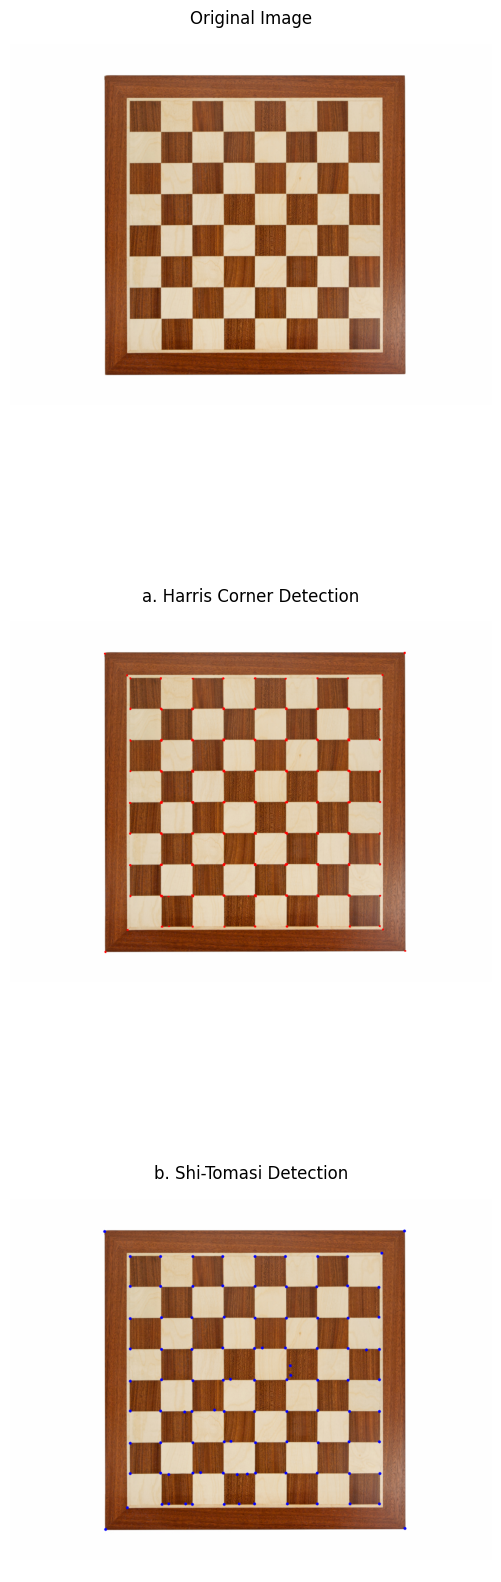

In [57]:
# Baca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/chess-board.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Metode Harris Corner Detection
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
harris_corners = cv2.dilate(harris_corners, None)  # Dilasi untuk memperjelas sudut

# Tampilkan sudut Harris pada gambar
image_harris = image.copy()
image_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]  # Warna merah untuk menandai sudut

# Metode Shi-Tomasi Detection
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)

# Tampilkan sudut Shi-Tomasi pada gambar
image_shi_tomasi = image.copy()
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image_shi_tomasi, (x, y), 3, 255, -1)  # Lingkaran dengan radius 3 pada sudut

# Tampilkan hasil
plt.figure(figsize=(20, 20))

plt.subplot(311), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplots_adjust(hspace=0.5)

plt.subplot(312), plt.imshow(cv2.cvtColor(image_harris, cv2.COLOR_BGR2RGB))
plt.title('a. Harris Corner Detection'), plt.axis('off')
plt.subplots_adjust(hspace=0.5)

plt.subplot(313), plt.imshow(cv2.cvtColor(image_shi_tomasi, cv2.COLOR_BGR2RGB))
plt.title('b. Shi-Tomasi Detection'), plt.axis('off')


plt.show()


## 5. Implementasi Metode Hough Transform pada OpenCV

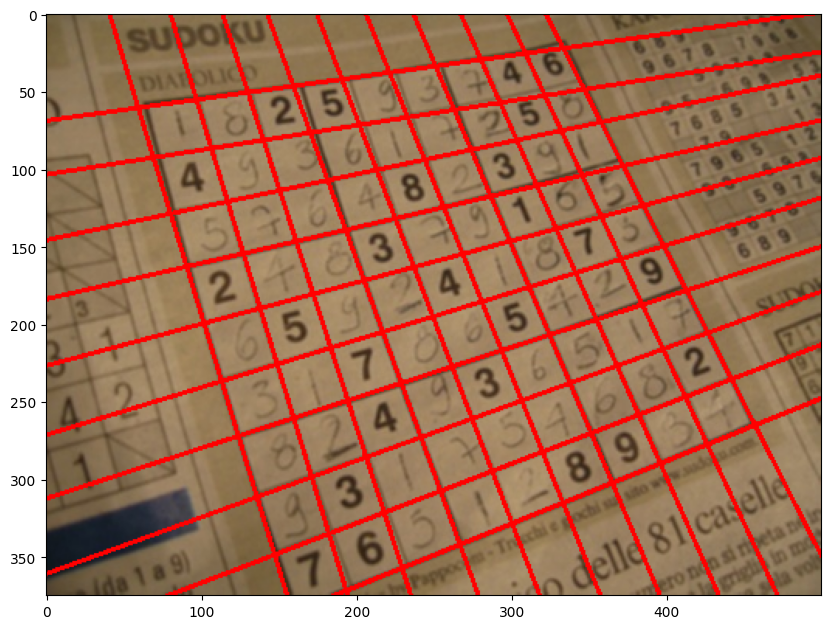

In [8]:
# Baca gambar
image = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/sudoku.jpg')

# Konversi ke citra keabuan
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Deteksi tepi dengan Canny Edge Detection
edges = cv.Canny(gray, 90, 150, apertureSize=3)

# Dilasi untuk menghubungkan tepi yang terputus
kernel_dilate = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel_dilate, iterations=1)

# Erosi untuk memisahkan garis yang terlalu rapat
kernel_erode = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel_erode, iterations=1)

# Deteksi garis menggunakan HoughLines
lines = cv.HoughLines(edges, 1, np.pi/180, 150)

if not lines.any():
    print('Tidak ada garis yang ditemukan')
    exit()

# Filter garis yang mirip
rho_threshold = 15
theta_threshold = 0.1

similar_lines = {i: [] for i in range(len(lines))}
for i in range(len(lines)):
    for j in range(len(lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

indices = [i for i in range(len(lines))]
indices.sort(key=lambda x: len(similar_lines[x]))

line_flags = len(lines) * [True]
for i in range(len(lines) - 1):
    if not line_flags[indices[i]]:
        continue

    for j in range(i + 1, len(lines)):
        if not line_flags[indices[j]]:
            continue
        rho_i, theta_i = lines[indices[i]][0]
        rho_j, theta_j = lines[indices[j]][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            line_flags[indices[j]] = False

filtered_lines = [lines[i] for i in range(len(lines)) if line_flags[i]]

# Gambar garis pada citra asli
for line in filtered_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Tampilkan hasil
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()

## 6. Implementasi fungsi findContours() pada OpenCV untuk Contour Detection

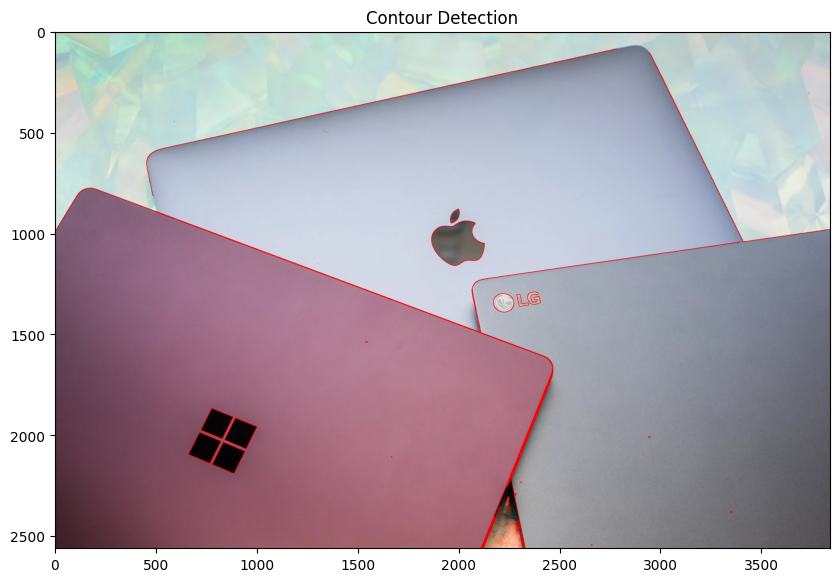

In [24]:
# Baca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/laptop.jpg')

# Konversi ke citra keabuan
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(gray, 50, 200)

# Deteksi kontur
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Gambar kontur pada citra asli
image_contour = image.copy()
cv2.drawContours(image_contour, contours, -1, (0, 0, 255), 2)

# Tampilkan hasil
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_contour, cv2.COLOR_BGR2RGB))
plt.title('Contour Detection'), plt.axis('on')

plt.show()

# Pengayaan Materi KTP

- Implementasi GaussianBlur untuk mengurangi noise
- Mengonversi citra ke grayscale
- Threshold dengan metode Otsu untuk mendapatkan citra biner
- Menerapkan metode erosi untuk memisahkan objek yang berdekatan
- Ekstraksi kontur pada citra hasil erosi
- Looping melalui setiap kontur yang telah diekstraksi. ika suatu kontur memenuhi kondisi tertentu terkait tinggi (h), lebar (w), dan rasio aspek, maka gambar kotak batas di atas gambar KTP dengan warna merah dan ketebalan sesuai dengan kondisi yang terpenuhi.

(Text(0.5, 1.0, 'Hasil Akhir'), (-0.5, 492.5, 299.5, -0.5))

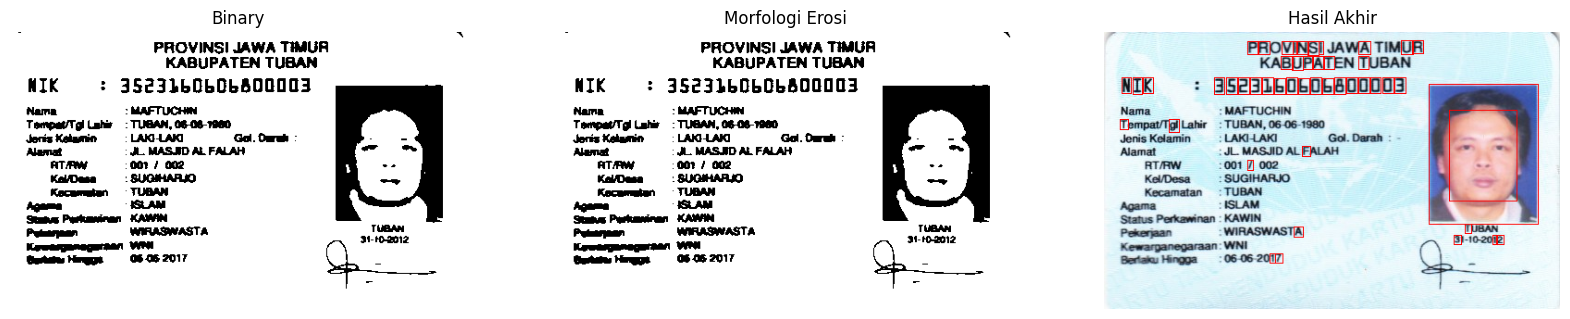

In [59]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np

ktp = cv.imread("/content/drive/MyDrive/PCVK/KTP/ktp3.png")

# Filtering
blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

# Binerisasi citra dengan Otsu's thresholding
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Morfologi erosi
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

plt.figure(figsize=(20,20))
# Gambar hasil biner
plt.subplot(131), plt.imshow(bw, cmap='gray')
plt.title('Binary'), plt.axis('off')

# Gambar hasil morfologi erosi
plt.subplot(132), plt.imshow(erode, cmap='gray')
plt.title('Morfologi Erosi'), plt.axis('off')

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 5 and float(ras) <= 1:
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Gambar hasil akhir
plt.subplot(133), plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))
plt.title('Hasil Akhir'), plt.axis('off')



- Mencoba menerapkan Adaptive Thresholding

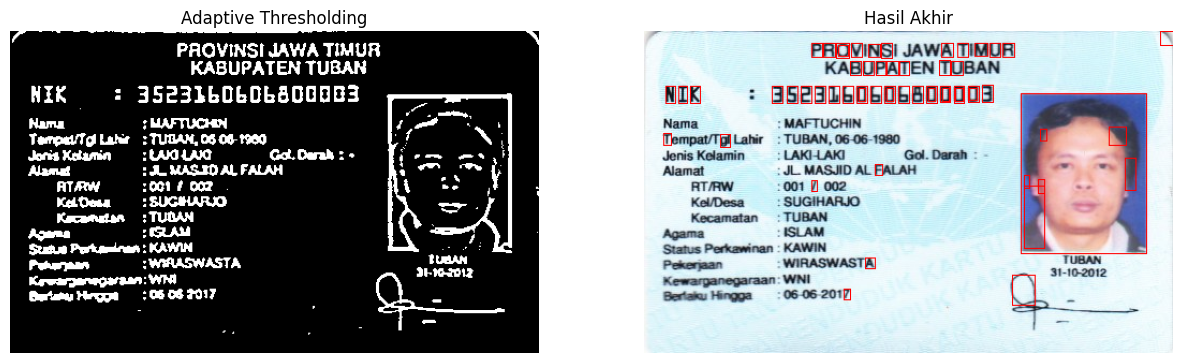

In [67]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
ktp = cv.imread("/content/drive/MyDrive/PCVK/KTP/ktp3.png")

# Filtering dengan Gaussian Blur
blurred = cv.GaussianBlur(ktp, (5, 5), 0)

# Ubah ke citra keabuan
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Binerisasi citra dengan Adaptive Thresholding
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 5)

# Ekstraksi kontur
contours, hierarchy = cv.findContours(bw.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Gambar hasil biner
plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(bw, cmap='gray')
plt.title('Adaptive Thresholding'), plt.axis('off')

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 5 and float(ras) <= 1:
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Gambar hasil akhir
plt.subplot(122), plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
plt.title('Hasil Akhir'), plt.axis('off')
plt.show()


# Tugas Praktikum

(Text(0.5, 1.0, 'Hasil Akhir'), (-0.5, 995.5, 635.5, -0.5))

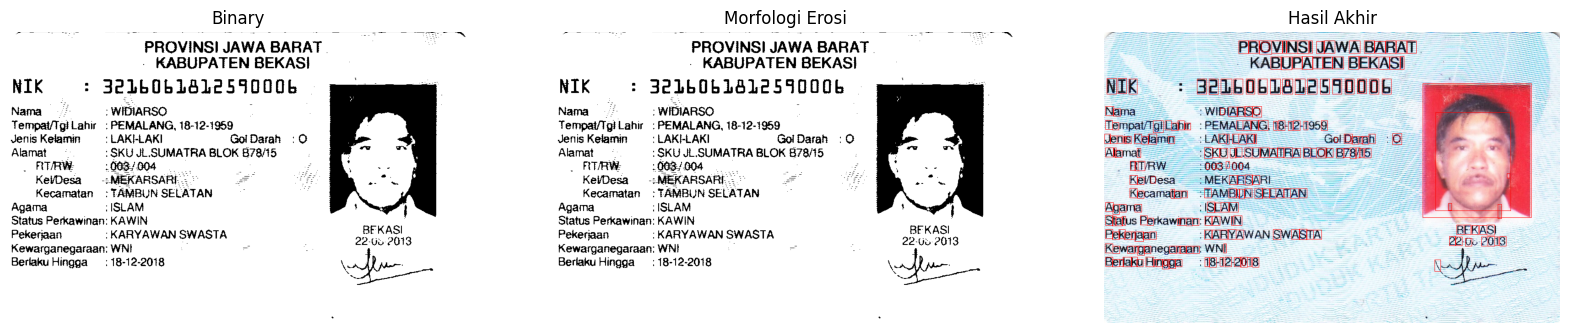

In [13]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np

ktp = cv.imread("/content/drive/MyDrive/PCVK/KTP/ktp6.png")

# Filtering
blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

# Binerisasi citra dengan Otsu's thresholding
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Morfologi erosi
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

plt.figure(figsize=(20,20))
# Gambar hasil biner
plt.subplot(131), plt.imshow(bw, cmap='gray')
plt.title('Binary'), plt.axis('off')

# Gambar hasil morfologi erosi
plt.subplot(132), plt.imshow(erode, cmap='gray')
plt.title('Morfologi Erosi'), plt.axis('off')

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 5 and float(ras) <= 1:
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Gambar hasil akhir
plt.subplot(133), plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))
plt.title('Hasil Akhir'), plt.axis('off')

